In [198]:
'JAIHANUMANJI'

'JAIHANUMANJI'

# Credit Scoring Individual Project

#### Submitted To : Professor Philipp Borchert
#### Submitted By : Aazad Ghoslya

## Survival Analysis
- Survival analysis is a field of statistics that focuses on analyzing the expected time until a certain event happens. Originally, this branch of statistics developed around measuring the effects of medical treatment on patients’ survival in clinical trials.
- However, survival analysis is not restricted to investigating deaths and can be just as well used for determining the time until a machine fails or — what may at first sound a bit counterintuitively— a user of a certain platform converts to a premium service. That is possible because survival analysis focuses on the time until an event happens, without actually defining the event as a negative one.

In [199]:
import pandas as pd
import numpy as np
import lifelines
import matplotlib.pyplot as plt

In [200]:
data = pd.read_csv(r"C:\Users\aghoslya\Desktop\Credit Scoring\Assignment2022_Data\mortgage.csv")

#### Expolre the data

In [201]:
data.head(5)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [202]:
data.describe()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
count,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,6.224890e+05,622219.000000,622489.000000,622489.00000,622489.000000,...,622489.000000,622489.000000,6.224890e+05,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000
mean,25147.492561,35.800806,20.570057,24.607362,137.206527,2.459649e+05,83.078239,6.702451,184.10245,1.381032,...,0.612067,0.138226,2.562539e+05,673.616922,78.975460,5.649546,198.115217,0.024351,0.042714,0.109779
std,13750.200051,11.579971,7.615170,6.739015,19.532501,2.141563e+05,24.968839,2.079246,27.65077,1.964645,...,0.487280,0.345137,2.197181e+05,71.724558,10.127052,2.978061,33.964785,0.154135,0.202212,0.427967
min,1.000000,1.000000,-40.000000,1.000000,18.000000,0.000000e+00,0.000000,0.000000,107.83000,-4.146711,...,0.000000,0.000000,0.000000e+00,400.000000,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000
25%,13580.000000,27.000000,18.000000,21.000000,137.000000,1.020174e+05,67.109446,5.650000,158.60000,1.104163,...,0.000000,0.000000,1.080000e+05,626.000000,75.000000,5.000000,179.450000,0.000000,0.000000,0.000000
50%,24881.000000,34.000000,22.000000,25.000000,142.000000,1.806183e+05,82.253269,6.625000,180.52000,1.850689,...,1.000000,0.000000,1.880000e+05,678.000000,80.000000,6.290000,216.770000,0.000000,0.000000,0.000000
75%,37045.000000,44.000000,25.000000,28.000000,145.000000,3.374950e+05,100.634381,7.875000,212.73000,2.694111,...,1.000000,0.000000,3.520000e+05,729.000000,80.000000,7.456000,222.390000,0.000000,0.000000,0.000000
max,50000.000000,60.000000,60.000000,60.000000,229.000000,8.701859e+06,803.513550,37.500000,226.29000,5.132464,...,1.000000,1.000000,8.000000e+06,840.000000,218.500000,19.750000,226.290000,1.000000,1.000000,2.000000


#### Check for the null values

In [203]:
data.isna().sum()

id                           0
time                         0
orig_time                    0
first_time                   0
mat_time                     0
balance_time                 0
LTV_time                   270
interest_rate_time           0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_time                  0
dtype: int64

##### There are 270 NA values in LTV_Time which is loan to value ratio at observation time, in %.
- Replace the NA vlaue with the mean

In [204]:
data['LTV_time'] = data['LTV_time'].fillna(data['LTV_time'].median())

##### Check for the NA values

In [205]:
data.isna().sum().sum()

0

#### Convert Episodic Data to Static Data

In [206]:
data_static = data.groupby("id").agg(np.max).reset_index()
data_static.shape

(50000, 23)

<AxesSubplot:ylabel='status_time'>

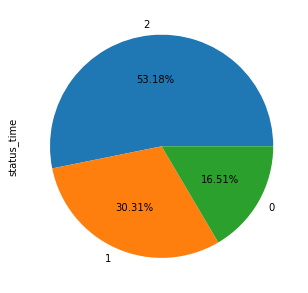

In [207]:
# display number of defaults
data_static["status_time"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

#### Evaluating whether the time to default for borrowers with low outstanding balance at origination time (30% quantile) significantly differs from borrowers with Average/High outstanding balance at origination time.

In [208]:
data_static['balance_orig_time'].quantile(0.3)
data_static['Balance_Low'] = 1
data_static.loc[(data_static['balance_orig_time'] > data_static['balance_orig_time'].quantile(0.3)),'Balance_Low'] = 0

#### Lifeline Plotting

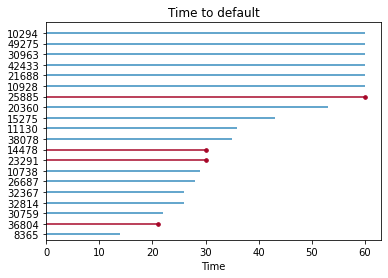

In [170]:
from lifelines.plotting import plot_lifetimes

data_samp = data_static.sample(20)
ax = plot_lifetimes(data_samp["time"], event_observed=data_samp["Balance_Low"])
ax.set_xlabel("Time")
ax.set_title("Time to default")
plt.show()

## Kaplan Meier Fitter

##### The Kaplan-Meier estimator (also known as the product-limit estimator, you will see why later on) is a non-parametric technique of estimating and plotting the survival probability as a function of time. It is often the first step in carrying out the survival analysis, as it is the simplest approach and requires the least assumptions. To carry out the analysis using the Kaplan-Meier approach, we assume the following:

- The event of interest is unambiguous and happens at a clearly specified time.
- The survival probability of all observations is the same, it does not matter exactly when they have entered the study.
- Censored observations have the same survival prospects as observations that continue to be followed.
##### In real-life cases, we never know the true survival function. That is why with the Kaplan-Meier estimator, we approximate the true survival function from the collected data.

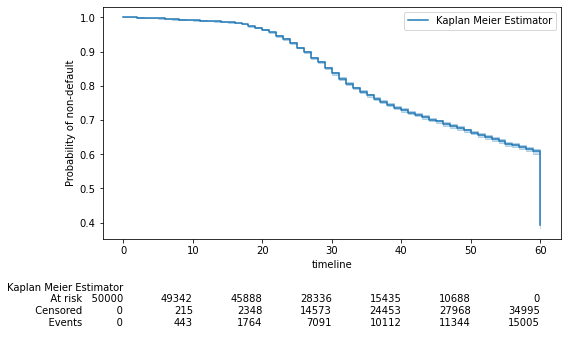

In [173]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
# fit on static data: TIME indicates the last observed timestep, TARGET indicates whether the customer defaulted
kmf.fit(data_static['time'], data_static['Balance_Low'], label='Kaplan Meier Estimator')

# plot survival function
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(8,5))
ax.set_ylabel('Probability of non-default')
plt.show()

#### Checking the median default time

31.0


C:\Users\aghoslya\AppData\Local\Temp/ipykernel_26064/578304161.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([median_default, median_default], [0,1], 'k-', c="red")


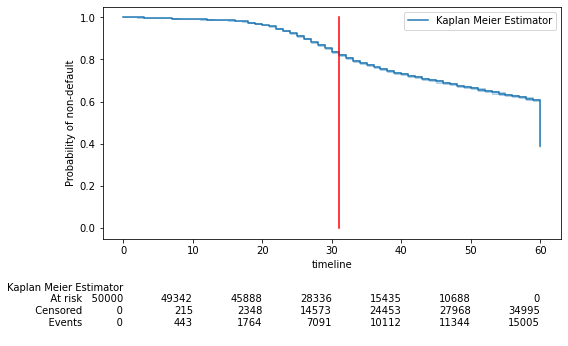

In [175]:
# Median default_time?
median_default = data_static.query("Balance_Low==1")["time"].median()
print(median_default)

# add to plot
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(8,5))
ax.set_ylabel('Probability of non-default')
plt.plot([median_default, median_default], [0,1], 'k-', c="red")
plt.show()

#### Event Table

In [176]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,50000,50000
1.0,22,15,7,0,50000
2.0,37,25,12,0,49978
3.0,57,44,13,0,49941
4.0,56,39,17,0,49884
...,...,...,...,...,...
56.0,223,70,153,0,8996
57.0,231,61,170,0,8773
58.0,245,93,152,0,8542


In [210]:
# "predict" probability to default at time 50

# 1 - probability of non-default at time 50
print(1 - kmf.predict(50))

# 1 - probability of non-default at time 25
print(1 - kmf.predict(25))

0.33685423428403505
0.0886000653504091


#### Cummulative Hazard Function 
  - Measures the total amount of risk that has been accumulated up to a certain point of time t. 
  - Provides the number of times we would mathematically expect the occurrence of the event of interest over a certain period if only the  events were repeatable.

#### Plotting the cumulative hazard function

<AxesSubplot:xlabel='timeline'>

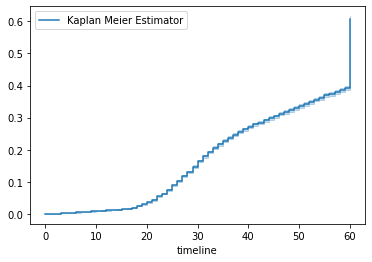

In [177]:
kmf.plot_cumulative_density()

#### Analysis

<AxesSubplot:ylabel='Balance_Low'>

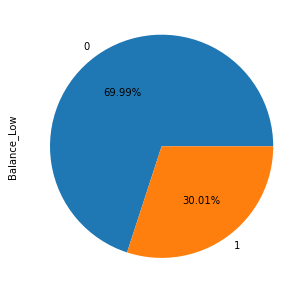

In [179]:
# display pie chart gender
data_static["Balance_Low"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

#### Comparing the 2 Groups

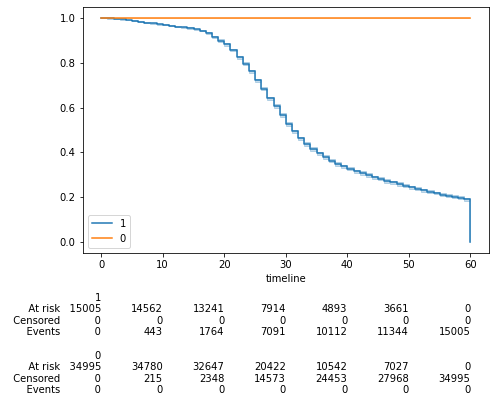

In [180]:
# Compare two groups

kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

fig, ax = plt.subplots(1,1 , figsize=(7,6))

# subset data
df1 = data_static.loc[data_static["Balance_Low"] == 1,:]
df2 = data_static.loc[data_static["Balance_Low"] == 0,:]

# fit subset gender = male
ax = kmf1.fit(df1['time'], df1['Balance_Low'], label='1').plot_survival_function(ax=ax)

# fit subset gender = female
ax = kmf2.fit(df2['time'], df2['Balance_Low'], label='0').plot_survival_function(ax=ax)

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf1, kmf2, ax=ax)
plt.tight_layout()

#### Log Rank 
- The logrank test statistic compares estimates of the hazard functions of the two groups at each observed event time. It is constructed by computing the observed and expected number of events in one of the groups at each observed event time and then adding these to obtain an overall summary across all-time points where there is an event. 

In [182]:
# Perform logrank test to assess whether there is a difference between Males and Females in time to default

from lifelines.statistics import logrank_test

# Null-Hypothesis: No difference between the two groups
res = logrank_test(df1['time'], df2['time'], event_observed_A=df1['Balance_Low'],event_observed_B=df2['Balance_Low'])

# We can reject the Null-Hypothesis (p < 0.05)
res.summary 

,test_statistic,p,-log2(p)
0,37151.577469,0.0,inf


#### - Cox Proportional Hazard model (time varying)

- The Cox's Proportional Hazard Model is the most frequently used multi- variate analysis method for analysing survival time data. It is a regression model which describes the relationship between an event occurrence, ex- pressed as hazard function and a set of covariates.

In [110]:
data_static.columns

Index(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'balance_time',
       'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time', 'Low_balance'],
      dtype='object')

#### - Exclude time varying variables

In [119]:
data_sub = data_static[["id", "time", "default_time", "hpi_time", "gdp_time", "uer_time", "balance_time",
"interest_rate_time", "FICO_orig_time", "LTV_time", "Low_balance"]].set_index("id")

#### -  Assumption: time always starts at 0 (no interval censored data)

In [183]:
data_sub["first_time"] = 0

In [185]:
data_sub['id'] = data_sub.index

In [186]:
from lifelines import CoxTimeVaryingFitter

# Note: credit_tv contains both time varying and static variables 
ctv = CoxTimeVaryingFitter()
ctv.fit(data_sub, id_col="id", event_col="Low_balance", start_col="first_time", stop_col="time", show_progress=True)
ctv.summary

Iteration 9: norm_delta = 0.00000, step_size = 1.00000, ll = -126412.63866, newton_decrement = 0.00000, seconds_since_start = 3.1Convergence completed after 9 iterations.


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
default_time,0.458467,1.581648,2.072664e-02,0.417844,0.499091,1.518684,1.647223,0.0,22.119720,2.041931e-108,357.738300
hpi_time,-0.015452,0.984667,6.017710e-04,-0.016631,-0.014272,0.983507,0.985829,0.0,-25.676827,2.121726e-145,480.594335
gdp_time,1.162542,3.198054,1.682787e-02,1.129560,1.195524,3.094296,3.305291,0.0,69.084347,0.000000e+00,inf
uer_time,-0.715506,0.488945,7.047466e-03,-0.729319,-0.701693,0.482237,0.495745,0.0,-101.526689,0.000000e+00,inf
balance_time,-0.000020,0.999980,1.987050e-07,-0.000021,-0.000020,0.999979,0.999980,0.0,-101.944714,0.000000e+00,inf
interest_rate_time,0.018349,1.018518,3.309298e-03,0.011863,0.024835,1.011934,1.025146,0.0,5.544717,2.944305e-08,25.017497
FICO_orig_time,0.000221,1.000221,1.219057e-04,-0.000018,0.000460,0.999982,1.000460,0.0,1.811959,6.999251e-02,3.836656
LTV_time,0.011034,1.011095,3.696597e-04,0.010309,0.011758,1.010363,1.011828,0.0,29.848742,9.115061e-196,647.909654


#### - Checking for the p values

In [187]:
round(ctv.summary['p'], 4)

covariate
default_time          0.00
hpi_time              0.00
gdp_time              0.00
uer_time              0.00
balance_time          0.00
interest_rate_time    0.00
FICO_orig_time        0.07
LTV_time              0.00
Name: p, dtype: float64

#### - Plot

<AxesSubplot:xlabel='log(HR) (95% CI)'>

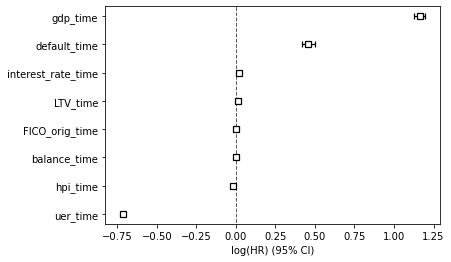

In [188]:
ctv.plot()

#### Parameter Values

In [191]:
print(round(ctv.params_, 6))

covariate
default_time          0.458467
hpi_time             -0.015452
gdp_time              1.162542
uer_time             -0.715506
balance_time         -0.000020
interest_rate_time    0.018349
FICO_orig_time        0.000221
LTV_time              0.011034
dtype: float64


#### Conclusions:

In [211]:
# Interpretation (under ceteris paribus assumption): 
print('\n An additional increase in Interest Rate with time could have led to increase the probability to Low Balance by {:.3f}%'.format((np.exp(0.018349) - 1)*100))
print('\n An additional increase in Unemployment Rate (due in the future) increase the probability to Low Balance by {:.3f}%'.format((np.exp(-0.715506) - 1)*100))
print('\n An additional increase in GDP (due in the future) increase the probability to Low Balance by {:.3f}%'.format((np.exp(1.162542) - 1)*100))


 An additional increase in Interest Rate with time could have led to increase the probability to Low Balance by 1.852%

 An additional increase in Unemployment Rate (due in the future) increase the probability to Low Balance by -51.106%

 An additional increase in GDP (due in the future) increase the probability to Low Balance by 219.805%


#### Plot

<AxesSubplot:>

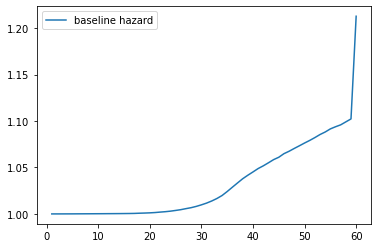

In [190]:
np.exp(ctv.baseline_cumulative_hazard_).plot()

#### Refrences
- https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e
- https://towardsdatascience.com/tagged/survival-analysis
- Class Notes and Code